### Importando Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Versão Pandas

In [2]:
pd.__version__

'0.24.2'

### Analisando dados CSV

#### Importando arquivo csv

In [3]:
df = pd.read_csv('datasets/aluguel.csv',sep = ';')
df.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


#### Tipo do arquivo csv

In [4]:
type(df)

pandas.core.frame.DataFrame

#### Principais informações do dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
Tipo          32960 non-null object
Bairro        32960 non-null object
Quartos       32960 non-null int64
Vagas         32960 non-null int64
Suites        32960 non-null int64
Area          32960 non-null int64
Valor         32943 non-null float64
Condominio    28867 non-null float64
IPTU          22723 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


#### linhas e colunas

In [6]:
print(df.shape)
print(df.shape[0])
print(df.shape[1])

(32960, 9)
32960
9


In [7]:
df.dtypes

Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Valor         float64
Condominio    float64
IPTU          float64
dtype: object

#### Dataframe com as colunas e seus tipos de dados

In [8]:
tipo_dados = pd.DataFrame(df.dtypes,columns=['Tipos de Dados'])
tipo_dados.columns.name = 'Variaveis'
tipo_dados

Variaveis,Tipos de Dados
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


### Analisando Tipo de Imóveis

#### Coluna 'Tipo' do dataframe aluguel.csv

In [9]:
df['Tipo']
df.Tipo.head()

0                  Quitinete
1                       Casa
2    Conjunto Comercial/Sala
3                Apartamento
4                Apartamento
Name: Tipo, dtype: object

#### Armazendo e analisando a coluna 'Tipo'

In [10]:
df_tipo = df['Tipo']
type(df_tipo)

pandas.core.series.Series

#### Retirando duplicados da coluna 'Tipo'

In [11]:
df_tipo.drop_duplicates()

0                          Quitinete
1                               Casa
2            Conjunto Comercial/Sala
3                        Apartamento
7                 Casa de Condomínio
16                    Prédio Inteiro
17                              Flat
29                        Loja/Salão
80           Galpão/Depósito/Armazém
83                    Casa Comercial
117                     Casa de Vila
159                   Terreno Padrão
207                      Box/Garagem
347                             Loft
589      Loja Shopping/ Ct Comercial
2157                         Chácara
3354           Loteamento/Condomínio
4379                           Sítio
4721                   Pousada/Chalé
6983                          Studio
9687                           Hotel
23614                      Indústria
Name: Tipo, dtype: object

#### Analisando a quantidade da coluna 'Tipo' sem duplicidade

In [12]:
len(df_tipo.drop_duplicates())

22

### Organizando os Tipos de Imóveis

#### dataframe de tipos de imoveis

In [13]:
df_tipo = pd.DataFrame(df_tipo)
df_tipo.head()

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Apartamento


#### index do dataframe de tipo de imoveis

In [14]:
df_tipo.index

RangeIndex(start=0, stop=32960, step=1)

#### Alterando os nomes das colunas do dataframe

In [15]:
df_tipo.index = range(df_tipo.shape[0])
df_tipo.columns.name = 'Id'
df_tipo.head()

Id,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Apartamento


#### Lista com a coluna 'Tipo' sem duplicidade

In [16]:
list(df_tipo['Tipo'].drop_duplicates())

['Quitinete',
 'Casa',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat',
 'Loja/Salão',
 'Galpão/Depósito/Armazém',
 'Casa Comercial',
 'Casa de Vila',
 'Terreno Padrão',
 'Box/Garagem',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Chácara',
 'Loteamento/Condomínio',
 'Sítio',
 'Pousada/Chalé',
 'Studio',
 'Hotel',
 'Indústria']

#### Lista com residencias

In [17]:
residencial = ['Quitinete','Casa','Apartamento','Casa de Condomínio','Casa de Vila']
residencial

['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

#### Valores booleanos da coluna 'Tipo' conforme lista residencial

In [18]:
df.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [19]:
selecao = df['Tipo'].isin(residencial)
selecao.head(10)

0     True
1     True
2    False
3     True
4     True
5     True
6     True
7     True
8     True
9    False
Name: Tipo, dtype: bool

#### Dataframe com a coluna 'Tipo' apenas com tipo residencial

In [20]:
df_residencial = df[selecao]
df_residencial.head(20)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


#### Lista do dataframe residencial

In [21]:
list(df_residencial['Tipo'].drop_duplicates())

['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

#### Diferença da quantidade do dataframe original pro residencial

In [22]:
print(df_residencial.shape[0]) # dataframe com tipos residenciais
print(df.shape[0]) # dataframe com todos os tipos

22580
32960


In [23]:
df_residencial.index = range(df_residencial.shape[0])
df_residencial.head(20)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


### Exportando arquivo csv

In [24]:
df_residencial.to_csv('./aluguel_residencial.csv',sep=';')

#### Erro ao exportar CSV com indice

In [25]:
df_r = pd.read_csv('datasets/aluguel_residencial.csv',sep=';')
df_r.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


#### Importando CSV sem indice

In [26]:
df_residencial.to_csv('datasets/aluguel_residencial.csv',sep=';',index=False)
df_r = pd.read_csv('datasets/aluguel_residencial.csv',sep=';')
df_r.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


### Seleções e Frequencias

#### Selecionando 'Apartamentos' no Dataframe

In [27]:
selecao_apto = df_residencial['Tipo'] == 'Apartamento'
selecao_casa = (df_residencial['Tipo']=='Casa')|(df_residencial['Tipo']=='Casa de Condomínio')|(df_residencial['Tipo']=='Casa de Vila')
selecao_area = (df_residencial['Area']>=60)&(df_residencial['Area']<=100)
selecao_pessoa = (df_residencial['Quartos']>=4)&(df_residencial['Valor']<2000.0)

#### Filtrando do Dataset 'Residencial' apenas o Tipo 'Apartamento'

In [28]:
df_apartamentos = df_residencial[selecao_apto]
df_casas = df_residencial[selecao_casa]
df_area = df_residencial[selecao_area]
df_pessoa = df_residencial[selecao_pessoa]

#### Alterando index

In [29]:
df_apartamentos.index = range(df_apartamentos.shape[0])
df_casas.index = range(df_casas.shape[0])
df_area.index = range(df_area.shape[0])
df_pessoa.index = range(df_pessoa.shape[0])

#### Quantidade/Frequencia de 'Apartamentos'

In [30]:
df_apartamentos.shape[0] # Quantidade de Apartamentos
df_casas.shape[0]        # Quantidade de Casa
df_area.shape[0]         # Quantidade de tipos de residencias com Area maior que 60 e menor que 100
df_pessoa.shape[0]       # Quantidade de Quarto maior que 4 e com valor menor que R$2000b

41

### Tratamento de Dados NaN

#### Booleanos para NaN

In [31]:
df.isnull().head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True


In [32]:
df.notnull().head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,False,False
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,False


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
Tipo          32960 non-null object
Bairro        32960 non-null object
Quartos       32960 non-null int64
Vagas         32960 non-null int64
Suites        32960 non-null int64
Area          32960 non-null int64
Valor         32943 non-null float64
Condominio    28867 non-null float64
IPTU          22723 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


#### Todos os valores nulos

In [34]:
df[df['Valor'].isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
76,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
2186,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
2456,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2646,Loja/Salão,Barra da Tijuca,0,2,0,80,NaN,NaN,NaN
2941,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2973,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
6598,Loja/Salão,Andaraí,0,0,0,326,NaN,NaN,1140.0
7302,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
12683,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
13229,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0


#### Retirando todos os valores nulos da colunas 'Valor'

In [35]:
df_nan = df.dropna(subset=['Valor'])
df_nan.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [36]:
df_nan[df_nan['Valor'].isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [37]:
df[df['Condominio'].isnull()].shape[0]

4093

#### Selecionando os valores nulos nas colunas 'Apartamento' e 'Condominio'

In [38]:
selecao_null_c = (df['Tipo']=='Apartamento')&(df['Condominio'].isnull())
selecao_null_c.head(20)

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
dtype: bool

In [39]:
df_nan = df_nan[~selecao_null_c]
df_nan.head()

/home/sid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [40]:
df.fillna(0).head(20)
df.fillna(0).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
Tipo          32960 non-null object
Bairro        32960 non-null object
Quartos       32960 non-null int64
Vagas         32960 non-null int64
Suites        32960 non-null int64
Area          32960 non-null int64
Valor         32960 non-null float64
Condominio    32960 non-null float64
IPTU          32960 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


### Criando novas variaveis

In [41]:
df['Valor Bruto'] = df['Valor'] + df['Condominio'] + df['IPTU']
df.fillna(0,inplace=True)
df.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,0.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,0.0
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,0.0
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,0.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,57223.0


In [42]:
df['Valor m2'] = (df['Valor'] / df['Area']).round(2)
df.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,0.0,70.00
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0,34.67
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,0.0,16.67
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,0.0,17.14
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,0.0,29.33
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,0.0,15.38
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,57223.0,50.36


### Grupos

In [43]:
bairros = df['Bairro'].unique()
selecao_bairro = df['Bairro'].isin(bairros)
df = df[selecao_bairro]
df['Bairro'].drop_duplicates()

0                            Copacabana
1                       Jardim Botânico
2                       Barra da Tijuca
3                                Centro
4                          Higienópolis
5                          Vista Alegre
6                              Cachambi
8                                 Ramos
11                               Grajaú
12                  Lins de Vasconcelos
16                             Botafogo
18                              Taquara
19              Freguesia (Jacarepaguá)
21                               Tijuca
23                               Olaria
25                               Leblon
26                        São Cristóvão
27                              Ipanema
29                         Campo Grande
36             Recreio dos Bandeirantes
40                      Jardim Oceânico
50                              Humaitá
62                            Península
64                                Méier
65                       Vargem Pequena


In [44]:
gb_bairro = df.groupby('Bairro')
type(gb_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [45]:
gb_bairro.groups

{'Abolição': Int64Index([ 2333,  4857, 10254, 10684, 11719, 14026, 14971, 15454, 19885,
             20022, 21523, 22497, 23804, 24298, 25171, 25952, 28007, 28488,
             28499, 30407, 30707, 32328],
            dtype='int64'),
 'Alto da Boa Vista': Int64Index([3315, 14190, 18345, 19109, 20137, 20448, 22011], dtype='int64'),
 'Anchieta': Int64Index([ 4603, 10494, 12605, 13584, 15384, 16390, 18974, 19211, 23364,
             23426, 23699, 26996],
            dtype='int64'),
 'Andaraí': Int64Index([  446,   577,   672,   768,   920,  1185,  1275,  1285,  1490,
              1770,
             ...
             30580, 31012, 31546, 31805, 31882, 31936, 32246, 32422, 32558,
             32613],
            dtype='int64', length=109),
 'Anil': Int64Index([  361,   855,   909,  1182,  1824,  2449,  2505,  2684,  2907,
              2932,  3210,  3585,  3939,  4033,  5488,  5636,  5911,  6377,
              6690,  7098,  7275,  7308,  8073,  8188,  8699,  9438,  9471,
              9746,

In [46]:
for bairro, dados in gb_bairro:
    print(bairro)

Abolição
Alto da Boa Vista
Anchieta
Andaraí
Anil
Arpoador
Bancários
Bangu
Barra da Tijuca
Barra de Guaratiba
Benfica
Bento Ribeiro
Bonsucesso
Botafogo
Braz de Pina
Cachambi
Cachamorra
Cacuia
Caju
Camorim
Campinho
Campo Grande
Cascadura
Castelo
Catete
Catumbi
Cavalcanti
Centro
Cidade Jardim
Cidade Nova
Cidade de Deus
Cinelândia
Cocotá
Coelho Neto
Colégio
Copacabana
Cordovil
Cosme Velho
Cosmos
Curicica
Del Castilho
Encantado
Engenho Novo
Engenho da Rainha
Engenho de Dentro
Estácio
Flamengo
Freguesia (Ilha do Governador)
Freguesia (Jacarepaguá)
Fátima
Gamboa
Gardênia Azul
Glória
Grajaú
Grumari
Guadalupe
Guaratiba
Gávea
Higienópolis
Honório Gurgel
Humaitá
Icaraí
Ilha do Governador
Inhaúma
Inhoaíba
Ipanema
Irajá
Itaguaí
Itanhangá
Jabour
Jacarepaguá
Jacaré
Jardim América
Jardim Botânico
Jardim Carioca
Jardim Guanabara
Jardim Oceânico
Jardim Sulacap
Joá
Lagoa
Lapa
Laranjeiras
Largo do Machado
Leblon
Leme
Lins de Vasconcelos
Madureira
Magalhães Bastos
Manguinhos
Maracanã
Marechal Hermes
Maria 

In [47]:
gb_bairro[['Valor','Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Abolição,2005.45,172.55
Alto da Boa Vista,7685.71,758.57
Anchieta,3061.67,6.58
Andaraí,1919.97,460.21
Anil,4807.58,441.31
Arpoador,10896.06,3028.56
Bancários,1825.00,217.00
Bangu,10358.18,613.34
Barra da Tijuca,9015.27,3457.14


In [48]:
gb_bairro['Valor'].describe().round(2).head(10)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,22.0,2005.45,1843.45,800.0,1025.0,1200.0,2225.0,8000.0
Alto da Boa Vista,7.0,7685.71,11052.25,600.0,1300.0,1850.0,9375.0,30000.0
Anchieta,12.0,3061.67,5836.00,600.0,700.0,775.0,962.5,20000.0
Andaraí,109.0,1919.97,2310.61,0.0,1200.0,1400.0,1700.0,20000.0
Anil,91.0,4807.58,10886.66,300.0,1100.0,1600.0,3650.0,70000.0
Arpoador,16.0,10896.06,8606.46,3000.0,5100.0,8000.0,15250.0,30000.0
Bancários,4.0,1825.00,665.21,1300.0,1525.0,1600.0,1900.0,2800.0
Bangu,44.0,10358.18,26975.01,400.0,850.0,1100.0,3525.0,160000.0
Barra da Tijuca,6259.0,9015.27,30185.65,0.0,2000.0,3500.0,8000.0,738197.0


In [49]:
gb_bairro['Valor'].aggregate(['min','max','sum']).round(2).head(10).rename(columns={'min':'Minimo','max':'Maximo','sum':'Soma'})

,Minimo,Maximo,Soma
Bairro,,,
Abolição,800.0,8000.0,44120.0
Alto da Boa Vista,600.0,30000.0,53800.0
Anchieta,600.0,20000.0,36740.0
Andaraí,0.0,20000.0,209277.0
Anil,300.0,70000.0,437490.0
Arpoador,3000.0,30000.0,174337.0
Bancários,1300.0,2800.0,7300.0
Bangu,400.0,160000.0,455760.0
Barra da Tijuca,0.0,738197.0,56426579.0


### Faixa de Valores

In [50]:
classes = [0,2,4,6,8]
labels = ['0~2 quartos','3~4 quartos','5~6 quartos','7~ quartos']
quartos = pd.cut(df.Quartos,classes)
pd.value_counts(quartos)

(0, 2]    12419
(2, 4]     9894
(4, 6]      709
(6, 8]       49
Name: Quartos, dtype: int64

In [51]:
quartos = pd.cut(df.Quartos,classes,labels=labels,include_lowest=True)
pd.value_counts(quartos)

0~2 quartos    22270
3~4 quartos     9894
5~6 quartos      709
7~ quartos        49
Name: Quartos, dtype: int64

In [52]:
%matplotlib inline
plt.rc('figure',figsize=(30,5))

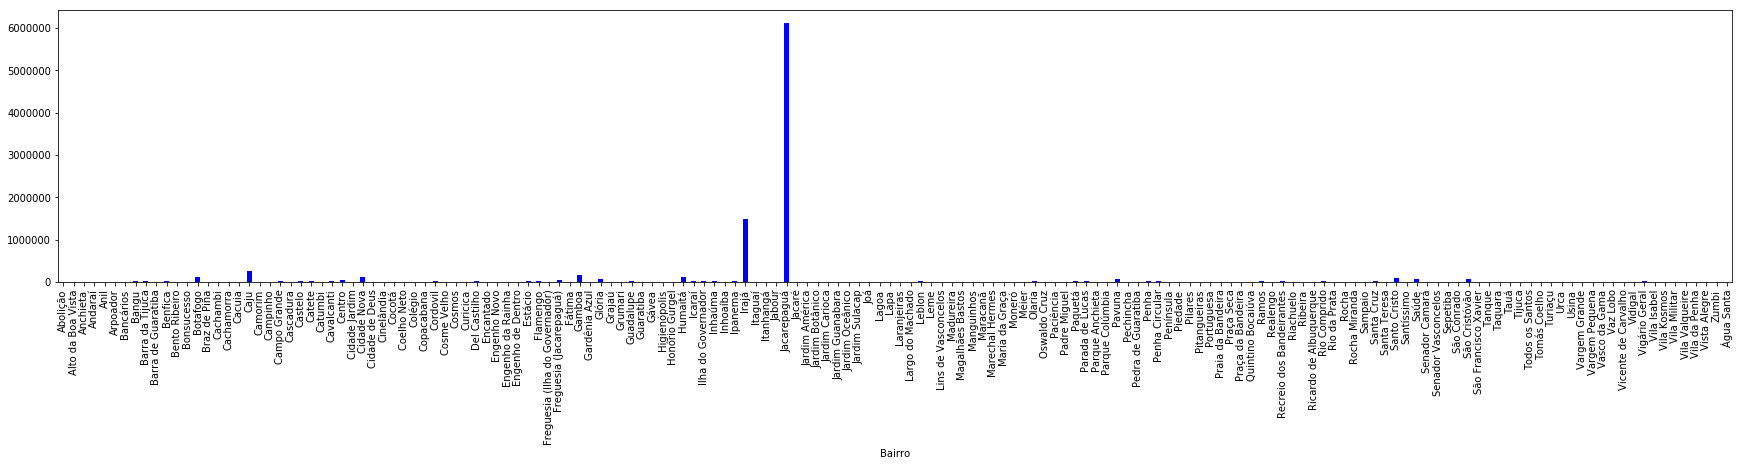

In [53]:
gb_bairro['Valor'].std().plot.bar(color='blue')

In [54]:
gb_bairro['Valor']